In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv("Pfam_analysis/outputs/prediction/pfam/DHFR/DHFR_train_dataset_inference.csv")
z_columns = ['z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5']
filtered_df = df[df['phylogeny'].str.contains('Eukaryota|Firmicutes|Actinobacteria', regex=True)].copy()
filtered_df['phylogeny'] = filtered_df['phylogeny'].str.extract('(Eukaryota|Firmicutes|Actinobacteria)', expand=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


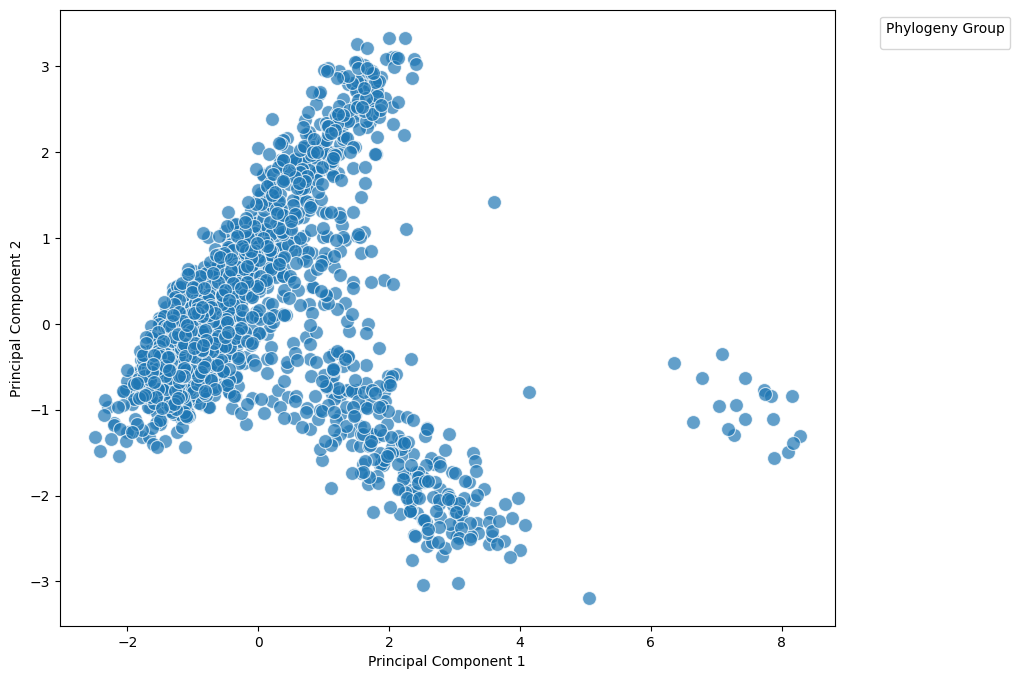

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[z_columns])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

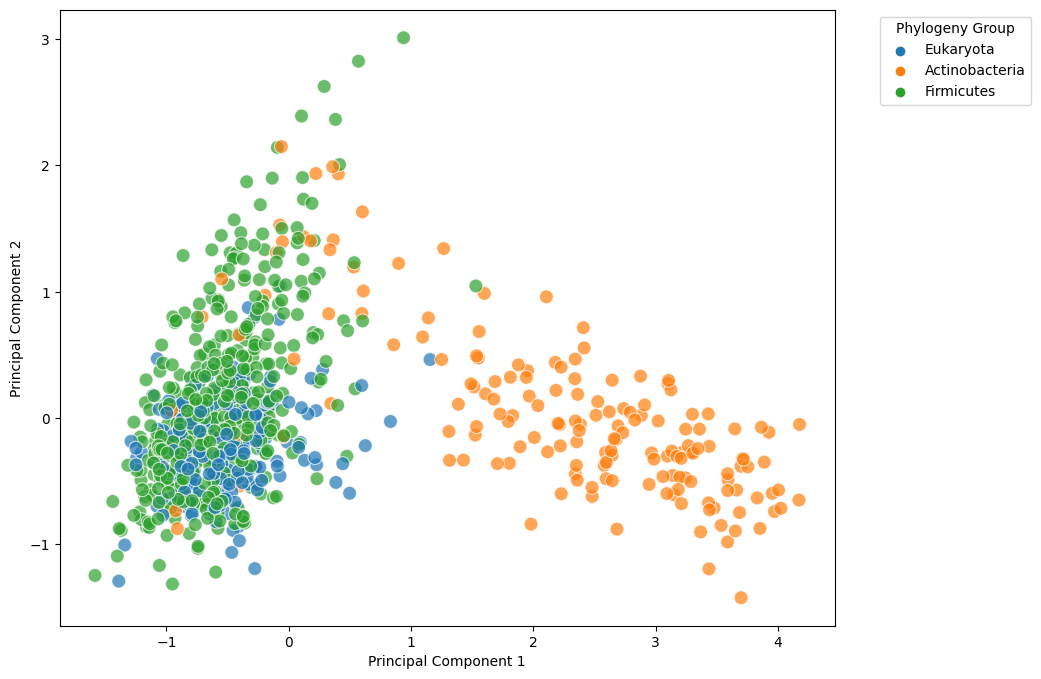

In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df[z_columns])
filtered_df['PCA1'] = pca_result[:, 0]
filtered_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='phylogeny', data=filtered_df, palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()